################################################################################################################################
#           Assignment 2: Author-Vaishali Lambe, NUID-001286444                            #
################################################################################################################################ 
**Question1:**
* Learn and understand Zipf’s Law.
* Pick any file (or files) in NLTK package.
* Prove if Zipf’s Law works in Natural Language or not.
* REQUIREMENTS: (Must Do) 
    * Use ’glob’ to open and read file. If read multiple files use LOOP to achieve. 
    * Create at least one function and one lambda function.
    * Save your data as an CSV file contains (Word, Rank, Frequency) with TITLE and Sort it by RANK. 
    * Open your CSV file, generate a log-log figure according to the data you saved. 
    * Write a conclusion at the end of your code base on figure. 
    * (Optional) Use matplotlib to generate a log-log figure in your code. 

################################################################################################################################

In [1]:
# Import standard modules.
from glob import glob
import os
import string

# Import nltk
import nltk

# Import gutenberg from nltk.corpus
from nltk.corpus import gutenberg

print(gutenberg.fileids())

['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']


In [2]:
# Get just the Shakespeare files from the Gutenberg collection.
print('nltk.data.path: ' + str(nltk.data.path))

# Save the current working directory, because we're going to change it to find the Shakespeare files in NLTK.
current_path = os.getcwd()
print(current_path)

# Find the Shakespeare files using glob.
shakespeare_files = []
for p in nltk.data.path:
    if os.path.isdir(p):
        os.chdir(os.path.join(p, 'corpora/gutenberg'))
        shakespeare_files = glob('shakespeare*txt')
        if len(shakespeare_files) > 0:
            # Found them, so stop.  Don't want multiple copies.
            break

print('shakespeare files: ' + str(shakespeare_files))

# Use a function to determine if a token is a valid word.
def is_valid_word(w):
    if w in string.punctuation:
        # Don't consider punctuation to be a valid word.
        return False
    
    return True

all_shakespeare_words = nltk.corpus.gutenberg.words(shakespeare_files)
shakespeare_words = list([w.lower() for w in all_shakespeare_words 
                          if is_valid_word(w.lower())])

print('\nFirst hundred words in shakespeare_words:')
print(shakespeare_words[0:100])

nltk.data.path: ['C:\\Users\\Admin/nltk_data', 'C:\\nltk_data', 'D:\\nltk_data', 'E:\\nltk_data', 'C:\\Users\\Admin\\Anaconda3\\nltk_data', 'C:\\Users\\Admin\\Anaconda3\\lib\\nltk_data', 'C:\\Users\\Admin\\AppData\\Roaming\\nltk_data']
C:\Users\Admin\Documents\DataAnalysisUsingPython\Assignment 2
shakespeare files: ['shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt']

First hundred words in shakespeare_words:
['the', 'tragedie', 'of', 'julius', 'caesar', 'by', 'william', 'shakespeare', '1599', 'actus', 'primus', 'scoena', 'prima', 'enter', 'flauius', 'murellus', 'and', 'certaine', 'commoners', 'ouer', 'the', 'stage', 'flauius', 'hence', 'home', 'you', 'idle', 'creatures', 'get', 'you', 'home', 'is', 'this', 'a', 'holiday', 'what', 'know', 'you', 'not', 'being', 'mechanicall', 'you', 'ought', 'not', 'walke', 'vpon', 'a', 'labouring', 'day', 'without', 'the', 'signe', 'of', 'your', 'profession', 'speake', 'what', 'trade', 'art', 'thou', 'car', 'why', 'sir', 'a'

In [3]:
# import FreqDist class
from nltk import FreqDist

# Create frequency distribution object
fd = FreqDist()

# For each token in the relevant text, increment its counter
for word in shakespeare_words:
    fd[word] += 1

# Total number of samples
print (fd.N())

# Number of unique words
print (fd.B())

# Look at the top 20 words sorted by frequency.  Use a lambda function.
common_words = map(lambda p: str(p[0]) + ' ' + str(p[1]), fd.most_common(20))
for cw in common_words:
    print(cw)

69499
7549
the 2222
and 2036
to 1515
i 1455
of 1302
you 1124
a 1019
my 914
that 904
in 826
it 778
is 769
not 722
d 662
his 588
with 557
this 546
for 533
me 529
your 528


In [4]:
import pandas as pd

# Generate a (rank, frequency) point for each counted token and
# and append to the respective lists, Note that the iteration
# over fd is automatically sorted.
row_list = []
rank = 0
for x in fd.most_common():
    word = x[0]
    count = x[1]
    rank += 1
    row = {'Word':word, 'Rank':rank, 'Frequency':count}
    row_list.append(row)
    
# Check the row list.    
print(row_list[0:5])

# Initialize a dataframe to hold our data.
df = pd.DataFrame(row_list, columns=['Word', 'Rank','Frequency'])

# Examine the dataframe.
print(df.head(20))

[{'Rank': 1, 'Frequency': 2222, 'Word': 'the'}, {'Rank': 2, 'Frequency': 2036, 'Word': 'and'}, {'Rank': 3, 'Frequency': 1515, 'Word': 'to'}, {'Rank': 4, 'Frequency': 1455, 'Word': 'i'}, {'Rank': 5, 'Frequency': 1302, 'Word': 'of'}]
    Word  Rank  Frequency
0    the     1       2222
1    and     2       2036
2     to     3       1515
3      i     4       1455
4     of     5       1302
5    you     6       1124
6      a     7       1019
7     my     8        914
8   that     9        904
9     in    10        826
10    it    11        778
11    is    12        769
12   not    13        722
13     d    14        662
14   his    15        588
15  with    16        557
16  this    17        546
17   for    18        533
18    me    19        529
19  your    20        528


In [5]:
# Write the CSV file.  Don't write the row numbers (index).
df.to_csv(os.path.join(current_path, 'shakespeare-zipflaw.csv'), index=False, encoding='utf-8')
df = None

In [6]:
# Import data from csv
csv_data = pd.read_csv(os.path.join(current_path, 'shakespeare-zipflaw.csv'), encoding='utf-8')

# Examine the dataframe.
print(csv_data.head(20))

    Word  Rank  Frequency
0    the     1       2222
1    and     2       2036
2     to     3       1515
3      i     4       1455
4     of     5       1302
5    you     6       1124
6      a     7       1019
7     my     8        914
8   that     9        904
9     in    10        826
10    it    11        778
11    is    12        769
12   not    13        722
13     d    14        662
14   his    15        588
15  with    16        557
16  this    17        546
17   for    18        533
18    me    19        529
19  your    20        528


In [7]:
#Import matplotlib
import matplotlib

# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

%matplotlib inline 

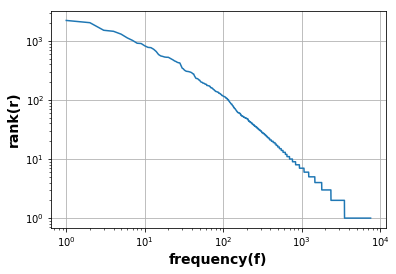

In [8]:
# Plot rank vs frequency on a log log plot and show the plot
plt.loglog(csv_data['Rank'], csv_data['Frequency'])
plt.xlabel('frequency(f)', fontsize=14, fontweight='bold')
plt.ylabel('rank(r)', fontsize=14, fontweight='bold')
plt.grid(True)
plt.show()

** Observations:**
* The shakespeare words shows that there is little variation from linear regression.
* The product of rank and Frequecy is not equal to constant for all words for their ranks and frequencies, so doesn't give 100% results to prove zipf's law
* To find the best fit line lets take log 10 of rank and frequency and find most fit r2 value to get linear regression

In [9]:
# Compute the best fit line.
import numpy as np

logFrequency = np.log10(csv_data['Frequency'])
logRank = np.log10(csv_data['Rank'])

coefficients=np.polyfit(logFrequency, logRank, 1)
print(coefficients)

[-0.86678422  3.73179857]


In [10]:
# Compute the r^2 value for the linear regression.

import scipy

def rsquared(x, y):
    """ Return R^2 where x and y are array-like."""

    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
    return r_value**2

print(rsquared(logFrequency, logRank))

0.969638055634


** Observations:**
* r^2 value gives value approximately equivalent to 1 and shows linear regression
* proves zipfs law to the best